# Libary

In [17]:
import pandas as pd
import os

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# hypothesis
Ho : Campaign tidak memberikan pengaruh terhadap purchasing

H1 : Campaign memberikan pengaruh terhadap purchasing



# Dataset

In [38]:
data=pd.DataFrame()
data['purchase_before_campaign']=pd.read_csv('/content/control_group.csv',sep=';')['# of Purchase']
data['purchase_after_campaign']=pd.read_csv('/content/test_group.csv',sep=';')['# of Purchase']

# Assumption checking

## Normality

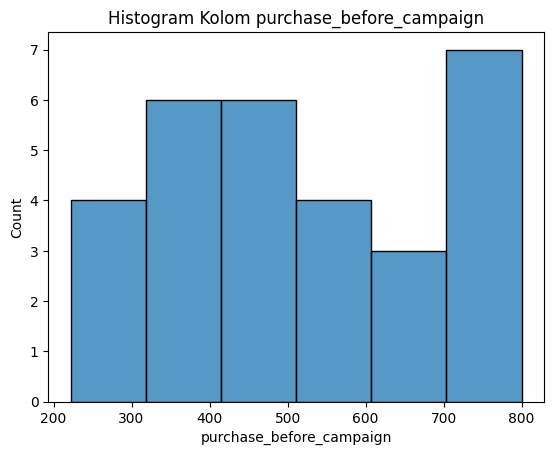

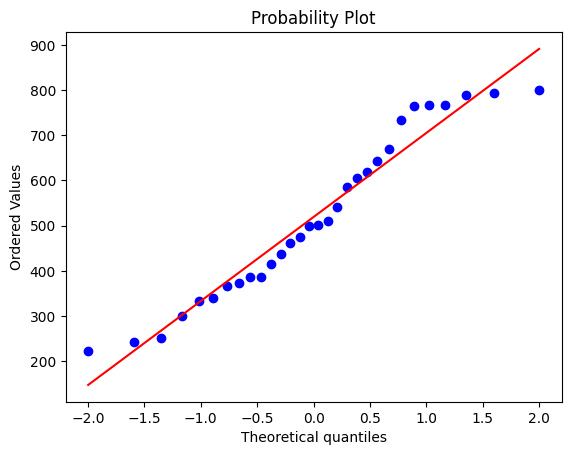

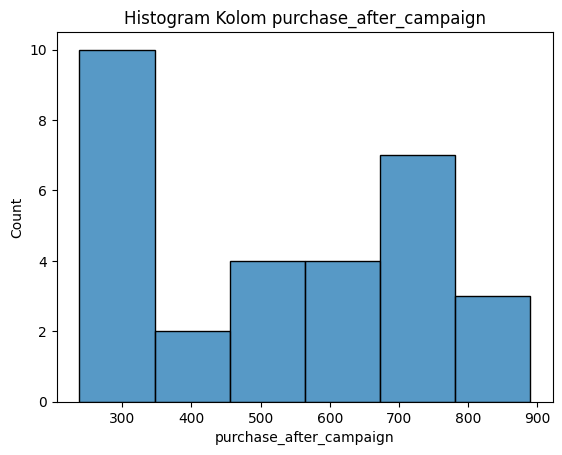

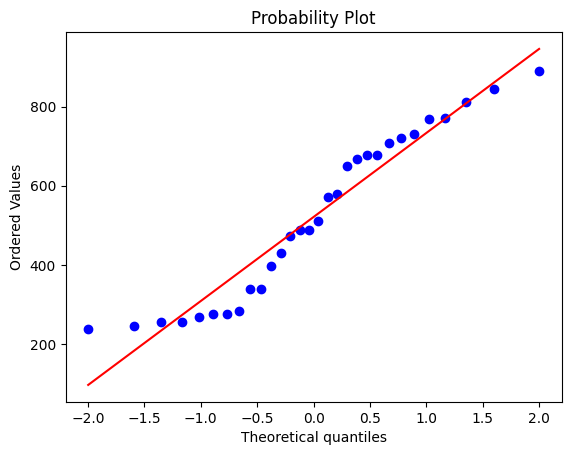

In [25]:
#pengeceken dengan histogram dan qq plot
for kol in data.columns :
  plt.title(f"Histogram Kolom {kol}")
  sns.histplot(data[kol])
  plt.show()

  plt.title(f"QQ Plot Kolom {kol}")
  stats.probplot(data[kol], dist="norm", plot=plt)
  plt.show()

In [24]:
#pengecekan normalitas dengan shapiro wilk
def shapiro_normality_check(df,col) :

  stat, p_value = stats.shapiro(df[col])

  print(f"Statistik Uji: {stat:.4f}")
  print(f"P-Value: {p_value:.4f}")

  if p_value > 0.05:
    print("Kesimpulan: Data Berdistribusi Normal (Gagal menolak H0)")
  else:
    print("Kesimpulan: Data TIDAK Berdistribusi Normal (Tolak H0)")

for i in data.columns :
  print(f"-------------- Normality Check pada kolom : {i} -------------- \n ")
  shapiro_normality_check(data,i)
  print("\n")

-------------- Normality Check pada kolom : purchase_before_campaign -------------- 
 
Statistik Uji: 0.9395
P-Value: 0.0881
Kesimpulan: Data Berdistribusi Normal (Gagal menolak H0)


-------------- Normality Check pada kolom : purchase_after_campaign -------------- 
 
Statistik Uji: 0.9182
P-Value: 0.0241
Kesimpulan: Data TIDAK Berdistribusi Normal (Tolak H0)




## Varians Homogenity

In [27]:
#pengecekan normalitas dengan shapiro wilk
def levene_homogenity_test(df,col1,col2) :

  stat_lev, p_lev = stats.levene(data[col1], data[col2], center='median')

  print("--- Uji Homogenitas Varians (Levene) ---")
  print(f"Statistik: {stat_lev:.4f}")
  print(f"P-Value  : {p_lev:.4f}")

  if p_lev > 0.05:
      print("Hasil: Varians Homogen (Sama)")
  else:
      print("Hasil: Varians Heterogen (Berbeda/TIDAK Homogen)")

levene_homogenity_test(data,'purchase_before_campaign','purchase_after_campaign')


--- Uji Homogenitas Varians (Levene) ---
Statistik: 1.4732
P-Value  : 0.2298
Hasil: Varians Homogen (Sama)


## Kesimpulan dari pengecekan asumsi
Normalitas : asumsi data berdistribusi normal tidak terpenuhi karena purchase_after_campaign tidak berdistribusi normal

Homogenitas : 2 Variabel itu memiliki varians yg sama

-----------------------------------------------


Dikarenakan asumsi normalitas tidak terpenuhi maka untuk menguji hipotesis akan dirubah ke metode non paramtri yaitu Mann-Whitney

# Hypothesis test with Mann-Whitney

In [41]:
def mann_whitney_test(df,col1,col2) :

  stat, p_value = stats.mannwhitneyu(df[col1], df[col2], alternative='two-sided')

  print(f"Statistik U: {stat}")
  print(f"P-Value: {p_value:.4f}")

  # Interpretasi
  if p_value < 0.05:
      print("Kesimpulan: Signifikan! Ada perbedaan nyata antara Grup Kontrol dan Campaign.")
  else:
      print("Kesimpulan: Tidak Signifikan. Campaign tidak memberikan efek yang berbeda nyata.")

mann_whitney_test(data,'purchase_before_campaign','purchase_after_campaign')

Statistik U: 450.0
P-Value: 1.0000
Kesimpulan: Tidak Signifikan. Campaign tidak memberikan efek yang berbeda nyata.


In [43]:
data.sum()

,0
purchase_before_campaign,15576
purchase_after_campaign,15637


# Hasil Uji Man Whitnney

*   Menunjukan bahwa p-value masih lebih besar dari 5% yang berarti Ho gagal ditolak dan dapat disimpulkan bahwa adanya campaign tidak memengaruhi jumlah purchase oleh customer

